In [27]:
#import

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

#parameters
batch_size = 100
learning_rate = 0.01
training_epochs = 20

In [5]:
#mnist data set
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


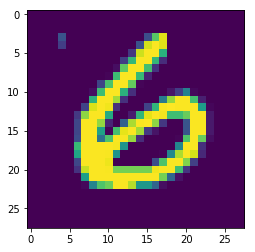

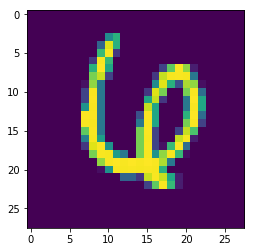

In [33]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

batch_xs, batch_ys = mnist.test.next_batch(2)
gen_image(batch_xs[0]).show()
gen_image(batch_xs[1]).show()

In [32]:
# None -> batch size can be any size, 784 -> flattened mnist image
x = tf.placeholder(tf.float32, shape=[None, 784]) 
# target 10 output classes
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [7]:
# model parameters will change during training so we use tf.Variable
W = tf.Variable(tf.zeros([784, 10]))
# bias
b = tf.Variable(tf.zeros([10]))

In [8]:
# y is our prediction
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [10]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy) 

In [28]:
with tf.Session() as sess:
  # variables need to be initialized before we can use them
    sess.run(tf.initialize_all_variables())

    # perform training cycles
    for epoch in range(training_epochs):
        
        # number of batches in one epoch
        batch_count = int(mnist.train.num_examples/batch_size)
        
        for i in range(batch_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            # perform the operations we defined earlier on batch
            sess.run([train_op], feed_dict={x: batch_x, y_: batch_y})
            
        if epoch % 2 == 0: 
            print ("Epoch: ", epoch) 
    print ("Accuracy: ", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print ("done")

Epoch:  0
Epoch:  2
Epoch:  4
Epoch:  6
Epoch:  8
Epoch:  10
Epoch:  12
Epoch:  14
Epoch:  16
Epoch:  18
Accuracy:  0.9115
done
